Implement a neural network in a modularized way and then perform
hyperparameter tuning.



In [2]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from cs231n.classifiers.fc_net import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver
from utils import report, run_tasks, makedirs
from cs231n.layer_utils import affine_relu_forward, affine_relu_backward
import warnings
warnings.filterwarnings("ignore")
from cs231n.optim import sgd_momentum



run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [3]:
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [4]:
def task1():
    '''
    Affine layer: foward - Open the file cs231n/layers.py and implement the affine_forward function.
    Once you are done you can test your implementaion by running the following:
    '''
    print('*'*30+' Task 1 '+'*'*30)
    num_inputs = 2
    input_shape = (4, 5, 6)
    output_dim = 3

    input_size = num_inputs * np.prod(input_shape)
    weight_size = output_dim * np.prod(input_shape)

    x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
    w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
    b = np.linspace(-0.3, 0.1, num=output_dim)

    out, _ = affine_forward(x, w, b)
    correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                            [ 3.25553199,  3.5141327,   3.77273342]])

    # Compare your output with ours. The error should be around 1e-9.
    print ('Testing affine_forward function:')
    print ('difference: ', rel_error(out, correct_out))
    print('*'*30+' Task 1 completed '+'*'*30)

In [5]:
task1()

****************************** Task 1 ******************************
Testing affine_forward function:
difference:  9.769849468192957e-10
****************************** Task 1 completed ******************************


In [6]:
def task2():
    '''
    Affine layer: backward Now implement the affine_backward function in cs231n/layers.py
    and test your implementation using numeric gradient checking.
    '''
    print('*'*30+' Task 2 '+'*'*30)
    x = np.random.randn(10, 2, 3)
    w = np.random.randn(6, 5)
    b = np.random.randn(5)
    dout = np.random.randn(10, 5)

    dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
    dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
    db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

    _, cache = affine_forward(x, w, b)
    dx, dw, db = affine_backward(dout, cache)

    # The error should be around 1e-10
    print ('Testing affine_backward function:')
    print ('dx error: ', rel_error(dx_num, dx))
    print ('dw error: ', rel_error(dw_num, dw))
    print ('db error: ', rel_error(db_num, db))
    print('*'*30+' Task 2 completed '+'*'*30)

In [7]:
task2()

****************************** Task 2 ******************************
Testing affine_backward function:
dx error:  3.212888085363629e-10
dw error:  3.133965063984431e-10
db error:  5.672869332672615e-12
****************************** Task 2 completed ******************************


In [8]:
def task3():
    '''
    ReLU layer: forward - Implement the forward pass for the ReLU activation function in
    the relu_forward function in cs231n/layers.py and test your implementation using the following:
    '''
    print('*'*30+' Task 3 '+'*'*30)
    x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

    out, _ = relu_forward(x)
    correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                            [ 0.,          0.,          0.04545455,  0.13636364,],
                            [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

    # Compare your output with ours. The error should be around 1e-8
    print ('Testing relu_forward function:')
    print ('difference: ', rel_error(out, correct_out))
    print('*'*30+' Task 3 completed'+'*'*30)

In [9]:
task3()

****************************** Task 3 ******************************
Testing relu_forward function:
difference:  4.999999798022158e-08
****************************** Task 3 completed******************************


In [10]:
def task4():
    '''
    ReLU layer: backward - Now implement the backward pass for the ReLU activation function in the
    relu_backward function in cs231n/layers.py and test your implementation using numeric gradient checking:
    '''
    print('*'*30+' Task 4 '+'*'*30)
    x = np.random.randn(10, 10)
    dout = np.random.randn(*x.shape)

    dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

    _, cache = relu_forward(x)
    dx = relu_backward(dout, cache)

    # The error should be around 1e-12
    print ('Testing relu_backward function:')
    print ('dx error: ', rel_error(dx_num, dx))
    print('*'*30+' Task 4 completed'+'*'*30)

In [11]:
task4()

****************************** Task 4 ******************************
Testing relu_backward function:
dx error:  3.2756397459906812e-12
****************************** Task 4 completed******************************


In [12]:
def task5(data):
    '''
    Following a more modular design, for this assignment we have split the
    logic for training models into a separate class.
    Open the file cs231n/solver.py and read through it to
    familiarize yourself with the API.
    After doing so, use a Solver instance to train a
    TwoLayerNet that achieves at least 50% accuracy
    on the validation set by only changing lr_decay and learning_rate.
    Change learning rates and learning rate decay with different values.
    '''
    print('*'*30+' Task 5 '+'*'*30)
    model = TwoLayerNet()
    solver = None
    solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                        'learning_rate': 1e-3,  #OK to change this
                    },
                    lr_decay=0.9,  #OK to change this
                    num_epochs=10, batch_size=100,
                    print_every=100)
    solver.train()
    print ('solver.train_acc_history:', solver.train_acc_history)
    print( 'solver.val_acc_history:', solver.val_acc_history)
    plt.subplot(2, 1, 1)
    plt.title('Training loss')
    plt.plot(solver.loss_history)
    plt.xlabel('Iteration')
    plt.subplot(2, 1, 2)
    plt.title('Accuracy')
    plt.plot(solver.train_acc_history, '-o', label='train')
    plt.plot(solver.val_acc_history, '-o', label='val')
    plt.plot([0.5] * len(solver.val_acc_history), 'k--')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.gcf().set_size_inches(15, 12)
    print('*'*30+' Task 5 completed '+'*'*30)

In [13]:
data = get_CIFAR10_data()

****************************** Task 5 ******************************
(Iteration 1 / 4900) loss: 2.300425
(Epoch 0 / 10) train acc: 0.190000; val_acc: 0.158000
(Iteration 101 / 4900) loss: 1.956304
(Iteration 201 / 4900) loss: 1.795255
(Iteration 301 / 4900) loss: 1.684259
(Iteration 401 / 4900) loss: 1.496003
(Epoch 1 / 10) train acc: 0.455000; val_acc: 0.446000
(Iteration 501 / 4900) loss: 1.625916
(Iteration 601 / 4900) loss: 1.488858
(Iteration 701 / 4900) loss: 1.505297
(Iteration 801 / 4900) loss: 1.259228
(Iteration 901 / 4900) loss: 1.385086
(Epoch 2 / 10) train acc: 0.488000; val_acc: 0.483000
(Iteration 1001 / 4900) loss: 1.499508
(Iteration 1101 / 4900) loss: 1.567819
(Iteration 1201 / 4900) loss: 1.277105
(Iteration 1301 / 4900) loss: 1.496063
(Iteration 1401 / 4900) loss: 1.421819
(Epoch 3 / 10) train acc: 0.484000; val_acc: 0.465000
(Iteration 1501 / 4900) loss: 1.521319
(Iteration 1601 / 4900) loss: 1.476604
(Iteration 1701 / 4900) loss: 1.217313
(Iteration 1801 / 4900) l

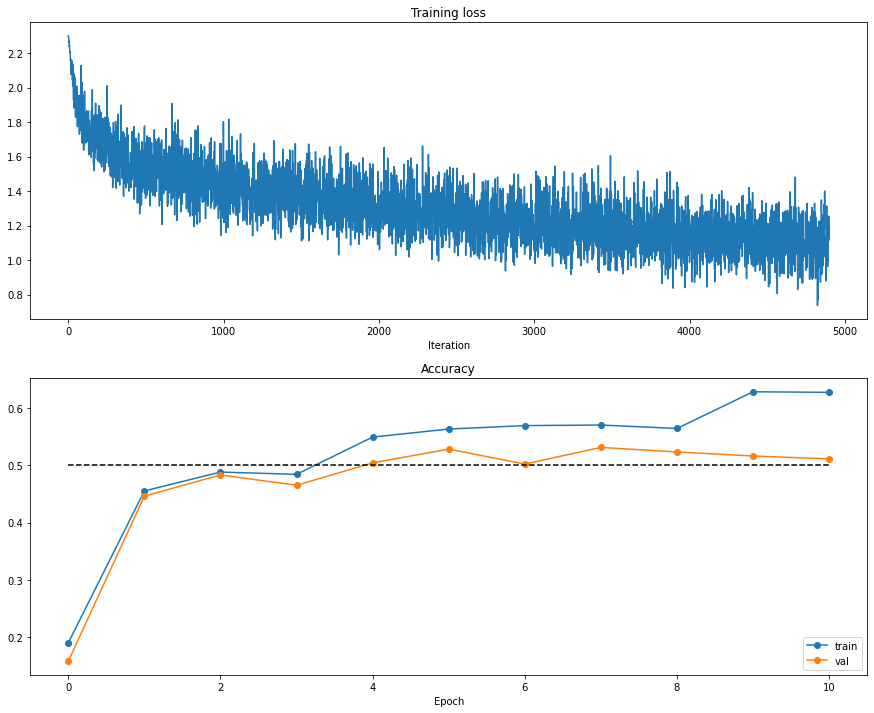

In [14]:

task5(data)

In [21]:
def task6(data):
    '''
    We will try a three-layer network with 100 units in each hidden layer.
    You will need to tweak the learning rate and initialization scale,
    but you should be able to overfit and achieve 100% training
    (ignore validation accuracy for now) accuracy within 20 epochs.
    Change learning rate and weight_scale with different values.
    '''
    print('*'*30+' Task 6 '+'*'*30)
    num_train = 50
    small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
    }

    weight_scale = 2e-2   #OK to tweak this
    learning_rate = 5e-3 #OK to tweak this
    model = FullyConnectedNet([100, 100],
                weight_scale=weight_scale, dtype=np.float64)
    solver = Solver(model, small_data,
                    print_every=10, num_epochs=20, batch_size=25,
                    update_rule='sgd',
                    optim_config={
                    'learning_rate': learning_rate,
                    }
            )
    solver.train()

    plt.plot(solver.loss_history)
    plt.title('Training loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Training loss')
    print('*'*30+' Task 6 completed '+'*'*30)

****************************** Task 6 ******************************
(Iteration 1 / 40) loss: 3.512598
(Epoch 0 / 20) train acc: 0.220000; val_acc: 0.129000
(Epoch 1 / 20) train acc: 0.340000; val_acc: 0.130000
(Epoch 2 / 20) train acc: 0.500000; val_acc: 0.142000
(Epoch 3 / 20) train acc: 0.740000; val_acc: 0.161000
(Epoch 4 / 20) train acc: 0.800000; val_acc: 0.162000
(Epoch 5 / 20) train acc: 0.900000; val_acc: 0.164000
(Iteration 11 / 40) loss: 0.618415
(Epoch 6 / 20) train acc: 0.960000; val_acc: 0.185000
(Epoch 7 / 20) train acc: 0.960000; val_acc: 0.160000
(Epoch 8 / 20) train acc: 0.980000; val_acc: 0.158000
(Epoch 9 / 20) train acc: 1.000000; val_acc: 0.160000
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.158000
(Iteration 21 / 40) loss: 0.120458
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.175000
(Epoch 12 / 20) train acc: 0.980000; val_acc: 0.168000
(Epoch 13 / 20) train acc: 0.980000; val_acc: 0.164000
(Epoch 14 / 20) train acc: 0.980000; val_acc: 0.160000
(Epoch 15 / 

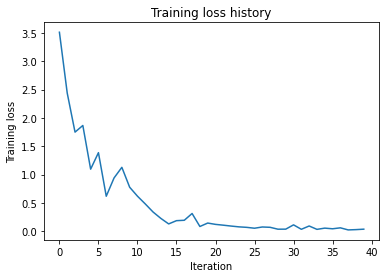

In [22]:
task6(data)

In [23]:
def task7(data):
    '''
    Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples.
    Again you will have to adjust the learning rate and weight initialization, but you should be able to
    achieve 100% training accuracy within 20 epochs.
    '''
    print('*'*30+' Task 7 '+'*'*30)
    num_train = 50
    small_data = {
    'X_train': data['X_train'][:num_train],
    'y_train': data['y_train'][:num_train],
    'X_val': data['X_val'],
    'y_val': data['y_val'],
    }

    learning_rates = [2e-4, 5e-3]
    weight_scale = [5e-2, 1e-3]
    results = {}
    best_train = -1
    best_l = -1
    best_w = -1
    #########################################
    #           TODO                        #
    #########################################
    # For each of the learning rates
    # and weight scale
    # 1. Create a fully connected net
    # 2. Create a solver
    # 3. Train the network
    # 4. Utilize the results dictionary
    #    to store a (l,w) as key and the
    #    train accuracy as value
    # 5. Find the best train accuracy value
    # 6. Find the best l and best w
    ################################################################################
    for lr in learning_rates:
        for ws in weight_scale:
            model = FullyConnectedNet([100, 100, 100, 100],
                weight_scale=ws, dtype=np.float64)
            solver = Solver(model, small_data,
                    print_every=10, num_epochs=20, batch_size=25,
                    update_rule='sgd',
                    optim_config={
                    'learning_rate': lr,
                    }
                    )

            results[lr, ws] = solver.train()
            if results[lr, ws] > best_train:
                best_train = results[lr, ws]
                best_l = lr
                best_w = ws

    print ('best_train=', best_train)
    print ('best_l=', best_l)
    print ('best_w=', best_w)
    model = FullyConnectedNet([100, 100, 100, 100],
                    weight_scale=best_w, dtype=np.float64)
    solver = Solver(model, small_data,
                    print_every=10, num_epochs=20, batch_size=25,
                    update_rule='sgd',
                    optim_config={
                    'learning_rate': best_l,
                    }
            )
    solver.train()

    plt.plot(solver.loss_history)
    plt.title('Training loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Training loss')
    print('*'*30+' Task 7 completed '+'*'*30)

****************************** Task 7 ******************************
(Iteration 1 / 40) loss: 3.462955
(Epoch 0 / 20) train acc: 0.080000; val_acc: 0.108000
(Epoch 1 / 20) train acc: 0.100000; val_acc: 0.113000
(Epoch 2 / 20) train acc: 0.060000; val_acc: 0.120000
(Epoch 3 / 20) train acc: 0.060000; val_acc: 0.129000
(Epoch 4 / 20) train acc: 0.080000; val_acc: 0.131000
(Epoch 5 / 20) train acc: 0.080000; val_acc: 0.136000
(Iteration 11 / 40) loss: 2.424767
(Epoch 6 / 20) train acc: 0.080000; val_acc: 0.132000
(Epoch 7 / 20) train acc: 0.080000; val_acc: 0.137000
(Epoch 8 / 20) train acc: 0.120000; val_acc: 0.140000
(Epoch 9 / 20) train acc: 0.140000; val_acc: 0.141000
(Epoch 10 / 20) train acc: 0.160000; val_acc: 0.134000
(Iteration 21 / 40) loss: 2.185043
(Epoch 11 / 20) train acc: 0.200000; val_acc: 0.139000
(Epoch 12 / 20) train acc: 0.220000; val_acc: 0.140000
(Epoch 13 / 20) train acc: 0.240000; val_acc: 0.140000
(Epoch 14 / 20) train acc: 0.260000; val_acc: 0.148000
(Epoch 15 / 

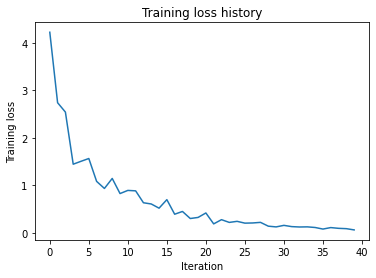

In [24]:
task7(data)

In [19]:
def task8():
    '''
    So far we have used vanilla stochastic gradient descent (SGD) as our update rule.
    More sophisticated update rules can make it easier to train deep networks.
    We will implement a few of the most commonly used update rules and compare them to vanilla SGD.
    SGD+Momentum Stochastic gradient descent with momentum is a widely used update rule that
    tends to make deep networks converge faster than vanilla stochstic gradient descent.
    Open the file cs231n/optim.py and read the documentation at the top of the file to make sure you understand the API.
    Implement the SGD+momentum update rule in the function sgd_momentum and run the following to
    check your implementation. You should see errors less than 1e-8.
    '''
    print('*'*30+' Task 8 '+'*'*30)
    N, D = 4, 5
    w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
    dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
    v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

    config = {'learning_rate': 1e-3, 'velocity': v}
    next_w, _ = sgd_momentum(w, dw, config=config)

    expected_next_w = np.asarray([
    [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
    [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
    [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
    [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
    expected_velocity = np.asarray([
    [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
    [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
    [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
    [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

    print ('next_w error: ', rel_error(next_w, expected_next_w))
    print ('velocity error: ', rel_error(expected_velocity, config['velocity']))
    print('*'*30+' Task 8 completed '+'*'*30)

In [20]:
task8()

****************************** Task 8 ******************************
next_w error:  8.882347033505819e-09
velocity error:  4.269287743278663e-09
****************************** Task 8 completed ******************************
